In This File Contain Image Processing Material Offical Documentation

In [22]:
import cv2 as cv
import sys
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [3]:
# cap = cv.VideoCapture(0)
# while(1):
#  # Take each frame
#  _, frame = cap.read()
#  # Convert BGR to HSV
#  hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
#  # define range of blue color in HSV
#  lower_blue = np.array([110,50,50])
#  upper_blue = np.array([130,255,255])
#  # Threshold the HSV image to get only blue colors
#  mask = cv.inRange(hsv, lower_blue, upper_blue)
#  # Bitwise-AND mask and original image
#  res = cv.bitwise_and(frame,frame, mask= mask)
#  cv.imshow('frame',frame)
#  cv.imshow('mask',mask)
#  cv.imshow('res',res)
#  k = cv.waitKey(5) & 0xFF
#  if k == 27:
#   break
# cv.destroyAllWindows()

**Geometric Transformations of Images**

In [4]:
#Scaling The Image 
img  = cv.imread("D:/PracticeAll/Images/cat.10.jpg")
print(img.shape)
height,width = img.shape[:2]
res = cv.resize(img,(2*height, 2*width), interpolation=cv.INTER_CUBIC)
print(res.shape)
img2 = cv.resize(img,(200,200),interpolation=cv.INTER_LINEAR)
print(img2.shape)
cv.imshow('img',img2)
cv.waitKey(0)
cv.destroyAllWindows()

(499, 489, 3)
(978, 998, 3)
(200, 200, 3)


**Translation**

In [5]:
img = cv.imread("D:/PracticeAll/Images/testingimg.jpg")
print("Image Shape Before Translation", img.shape)

matrix = np.float32([[1,0,100],[0,1,100]])
img = cv.warpAffine(img,matrix,(img.shape[1]+100,img.shape[0]+100))
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

Image Shape Before Translation (280, 450, 3)


**Rotation**
 

In [6]:
img = cv.imread("D:/PracticeAll/Images/testingimg.jpg")
height,width = img.shape[:2]
#Translation Matrix
matrix = cv.getRotationMatrix2D((width/2,height/2),65,1)
translated = cv.warpAffine(img,matrix,(width,height))

cv.imshow('img', translated)
cv.waitKey(0)
cv.destroyAllWindows()

**Affine Transformation**

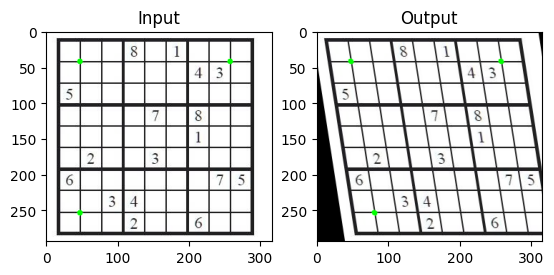

In [7]:

img = cv.imread("D:/PracticeAll/Images/suduko.jpg")
rows,cols,ch = img.shape
cv.circle(img,(47,42),4,(0,255,0),-1)
cv.circle(img,(257,42),4,(0,255,0),-1)
cv.circle(img,(47,254),4,(0,255,0),-1)

# cv.circle(img,(257,254),4,(0,255,0),-1)

pts1 = np.float32([[47,42],[257,42],[47,254]])
pts2 = np.float32([[47,42],[257,42],[80,254]])

matrix = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,matrix,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title("Input")
plt.subplot(122),plt.imshow(dst),plt.title("Output")
plt.show()

# plt.imshow(img)
# cv.imshow('img', img)
# cv.imshow('Affine Image', dst)

# cv.waitKey(0)
# cv.destroyAllWindows()

**Image Thresholding**
Simple Thresholding
    cv.THRESH_BINARY
    cv.THRESH_BINARY_INV
    cv.THRESH_TRUNC
    cv.THRESH_TOZERO
    cv.THRESH_TOZERO_INV

(824, 860, 3)


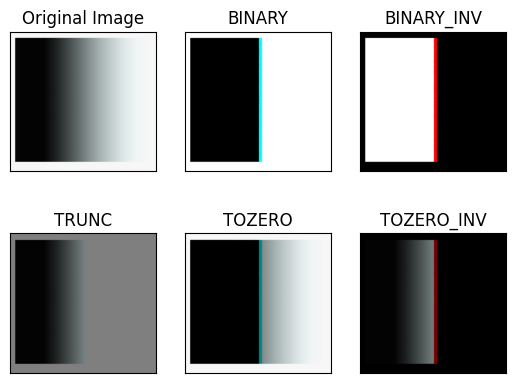

In [8]:
img = cv.imread('D:/PracticeAll/Images/gradient.png')
print(img.shape)
_, thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
_, thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
_, thresh4 = cv.threshold(img, 127,255, cv.THRESH_TOZERO)
_, thresh5 = cv.threshold(img, 127,255,cv.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2,thresh3,thresh4, thresh5]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=300)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()






**Adaptive Thresholding**

(1024, 896)


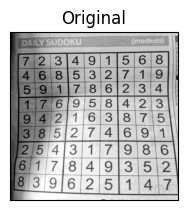

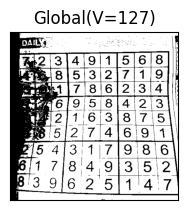

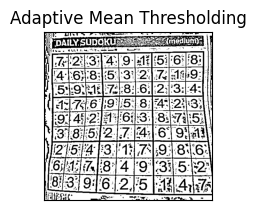

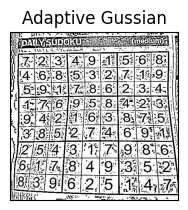

In [9]:
img = cv.imread('D:/PracticeAll/Images/suduko2.jpg',0)
print(img.shape)
img = cv.resize(img,(500,500))
_, th1 = cv.threshold(img, 127,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original','Global(V=127)','Adaptive Mean Thresholding', 'Adaptive Gussian']
images = [img,th1,th2,th3]

for i in range (4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()


# cv.imshow("Image",img)
# cv.imshow("Threshhold", th1)
# cv.imshow("Image2",th2)
# cv.waitKey(0)
# cv.destroyAllWindows()

**Otsu's Binarization**

Topic
**Smoothing Images**

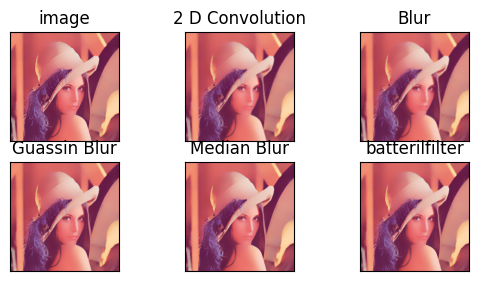

In [10]:
img = cv.imread('D:/PracticeAll/Images/lena.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)



#Filtering The Image
kernal = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernal)
blur = cv.blur(img,(5,5))
gblur = cv.GaussianBlur(img,(5,5),0)
median = cv.medianBlur(img,5)
biterialfilter = cv.bilateralFilter(img,9,75,75)
 

titles=['image','2 D Convolution','Blur','Guassin Blur','Median Blur','batterilfilter']
images=[img,dst,blur,gblur, median,biterialfilter]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()    

Topic 
**Morphological Transformations**

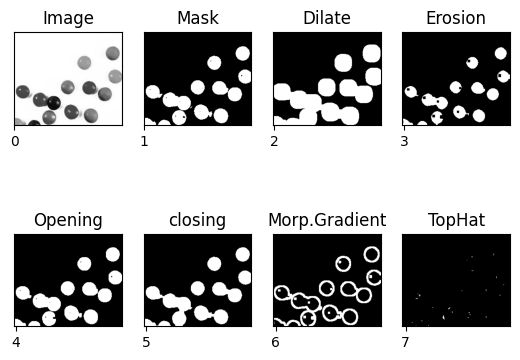

In [11]:
img = cv.imread('D:/PracticeAll/Images/smarties.jpg', cv.IMREAD_GRAYSCALE)

_, mask = cv.threshold(img, 210,255,cv.THRESH_BINARY_INV)
kernal = np.ones((5,5),np.uint8)
dilation = cv.dilate(mask, kernal, iterations=2)
erosion = cv.erode(mask,kernal,iterations=1)
opening = cv.morphologyEx(mask,cv.MORPH_OPEN,kernal)
closing = cv.morphologyEx(mask,cv.MORPH_CLOSE,kernal)
mg = cv.morphologyEx(mask,cv.MORPH_GRADIENT,kernal)
th = cv.morphologyEx(mask,cv.MORPH_TOPHAT,kernal)



titles = ['Image', 'Mask','Dilate','Erosion','Opening','closing','Morp.Gradient','TopHat']
images = [img, mask,dilation,erosion,opening,closing,mg,th]

for i in range(8):
    plt.subplot(2,4,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([i]),plt.yticks([])
plt.show()    

Topic 
**Image Gradients**
A image Gradient is a directional change in the intensity or color in an image 
method of Geadients
laplacian derivatives

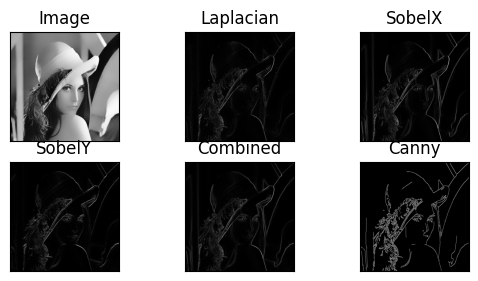

In [12]:
img = cv.imread('D:/PracticeAll/Images/lena.png',cv.IMREAD_GRAYSCALE)

#Laplacin 
lap = cv.Laplacian(img,cv.CV_64F,ksize=1)
lap = np.uint8(np.absolute(lap))

sobelX = cv.Sobel(img,cv.CV_64F,1,0,ksize=1)
sobelY = cv.Sobel(img,cv.CV_64F, 0,1,ksize=1)


sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
combined = cv.bitwise_or(sobelX,sobelY)

combinedXY = cv.addWeighted(sobelX,0.5, sobelY,0.5,0)

edges = cv.Canny(img, 80, 150)
titles = ['Image','Laplacian','SobelX','SobelY','Combined','Canny']
images = [img,lap,sobelX,sobelY,combined,edges]

for i in range(6):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

    

Topic 
**Canny Edge Detection**
the canny edege detection algorithm is composed of 5 steps 
    1 Noise reduction
    2 Graident Calculation
    3 Non maximum suppression
    4 Double Threshold 
    5 Edge Tracking by Hysteresis

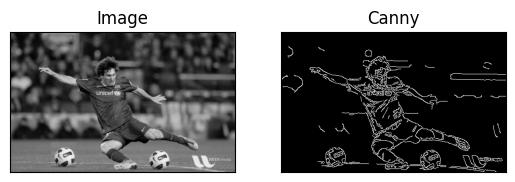

In [13]:
img = cv.imread('D:/PracticeAll/Images/testingimg.jpg',cv.IMREAD_GRAYSCALE)

canny = cv.Canny(img,100,200,)


titles = ['Image','Canny']
images = [img,canny]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Topic 
**Image Pyramids**

In [21]:
img = cv.imread('D:/PracticeAll/Images/lena.png')

# lower_resolution = cv.pyrDown(img)
# lower_resolution2 = cv.pyrDown(lower_resolution)
# cv.imshow("pyrDown 1 Image", lower_resolution)
# cv.imshow("pyrDown 2 Image", lower_resolution2)

# 1) Gaussian Pyramid

layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv.pyrDown(layer)
    gp.append(layer)
    # cv.imshow(str(i),layer)
    
# Laplacian Pyramids
layer = gp[5]
cv.imshow('Upper level Gussian Pyramid', layer)
lp = [layer]

for i in range(5,0,-1):
    gussian_extended = cv.pyrUp(gp[i])
    laplacian = cv.subtract(gp[i-1], gussian_extended)
    cv.imshow(str(i), laplacian)



cv.imshow("Original Image", img)
cv.waitKey(0)
cv.destroyAllWindows()

**Image Blending using Pyramids**

In [34]:
apple = cv.imread("D:/PracticeAll/Images/apple3.jpg")
orange = cv.imread('D:/PracticeAll/Images/orange.jpg')
# apple=cv.resize(apple,(300,300))

print(apple.shape)
print(orange.shape)

apple_orange = np.hstack((apple[:, :150], orange[:, 150:]))

#Generate Gussian Pyramids for Apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv.pyrDown(apple_copy)
    gp_apple.append(apple_copy)
    
#Generate Gussian Pyramids for Orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv.pyrDown(orange_copy)
    gp_orange.append(orange_copy)    
    
#Generate Laplacian Pyramids for Apple  
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gussian_expnded = cv.pyrUp(gp_apple[i])
    laplacian = cv.subtract(gp_apple[i-1], gussian_expnded)
    lp_apple.append(laplacian)
    
#Generate Laplacian Pyramids for Orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5,0,-1):
    gussian_expnded = cv.pyrUp(gp_orange[i])
    laplacian = cv.subtract(gp_orange[i-1],gussian_expnded)
    lp_orange.append(laplacian)    
    
    
#Add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap,orange_lap in zip(lp_apple,lp_orange):
    n += 1
    cols,rows,ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
    
#Reconstruct 
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv.add(apple_orange_pyramid[i], apple_orange_reconstruct)
            
    

cv.imshow("apple", apple)
cv.imshow("Orange",orange)
cv.imshow('Apple_Orange',apple_orange)
cv.imshow('apple_orange_reconstruct',apple_orange_reconstruct)

cv.waitKey(0)
cv.destroyAllWindows()

(300, 300, 3)
(300, 300, 3)


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


**Contours in OpenCV**
